<h2>Price Prediction Project

<h2>1.EDA

In [2]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [3]:
mp_train=pd.read_excel("Data_Train.xlsx")
mp_test=pd.read_excel("Data_Test.xlsx")

In [4]:
mp_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
mp_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


__As we see there are units like km/kg, kmpl, cc, bhp which are not necessary. So we will remove them. Also we can observe the name column having two important information the company name and the car model name, so we will split them and make new column.__

In [6]:
mp_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
mp_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [8]:
mp_train.shape

(6019, 12)

In [9]:
mp_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
mp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


__We will have to change the datatypes of independent variables to int & float as we will have to feed this data to our model.__

<h2>2.Data Preprocessing

In [11]:
mp_train['Mileage']=mp_train.Mileage.str.replace('km/kg','').str.replace('kmpl','')
mp_train['Engine']=mp_train.Engine.str.replace('CC','')
mp_train['Power']=mp_train.Power.str.replace(' bhp','')
mp_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [12]:
mp_test['Mileage']=mp_test.Mileage.str.replace('km/kg','').str.replace('kmpl','')
mp_test['Engine']=mp_test.Engine.str.replace('CC','')
mp_test['Power']=mp_test.Power.str.replace(' bhp','')
mp_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0


In [13]:
temp1= mp_train.Name.str.split().str.get(1)
temp2= mp_test.Name.str.split().str.get(1)
mp_train['Name'] = mp_train.Name.str.split().str.get(0)
mp_test['Name'] = mp_test.Name.str.split().str.get(0)
mp_train.insert(1, 'Model', temp1)
mp_test.insert(1, 'Model', temp2)

In [14]:
mp_train.head()

,Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [15]:
mp_train['Seats'].fillna(value=5.0, inplace=True)
mp_test['Seats'].fillna(value=5.0 ,inplace=True)

In [16]:
mp_train.head()

,Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [17]:
temp = pd.concat([mp_train,mp_test], sort=False)

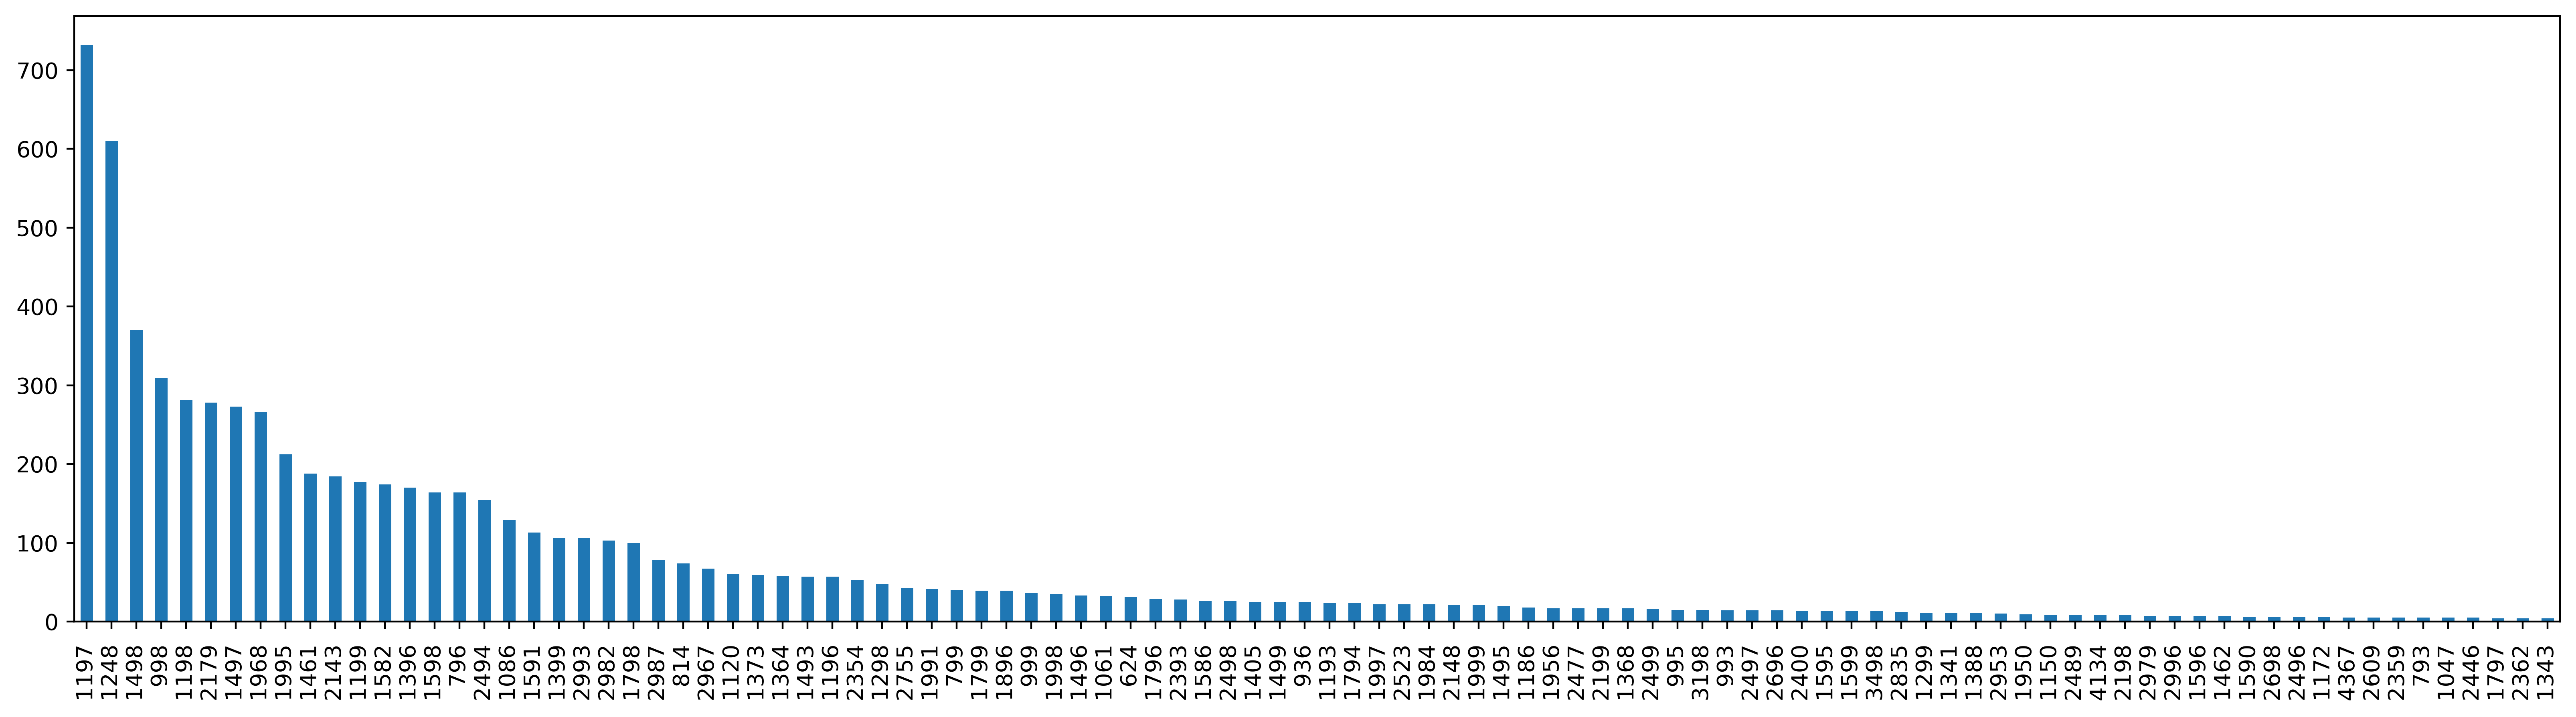

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5), dpi=400)
temp['Engine'].value_counts().head(100).plot.bar()
plt.show()

In [19]:
mp_train['Engine'] = mp_train['Engine'].fillna('1197')
mp_test['Engine'] = mp_test['Engine'].fillna('1197')

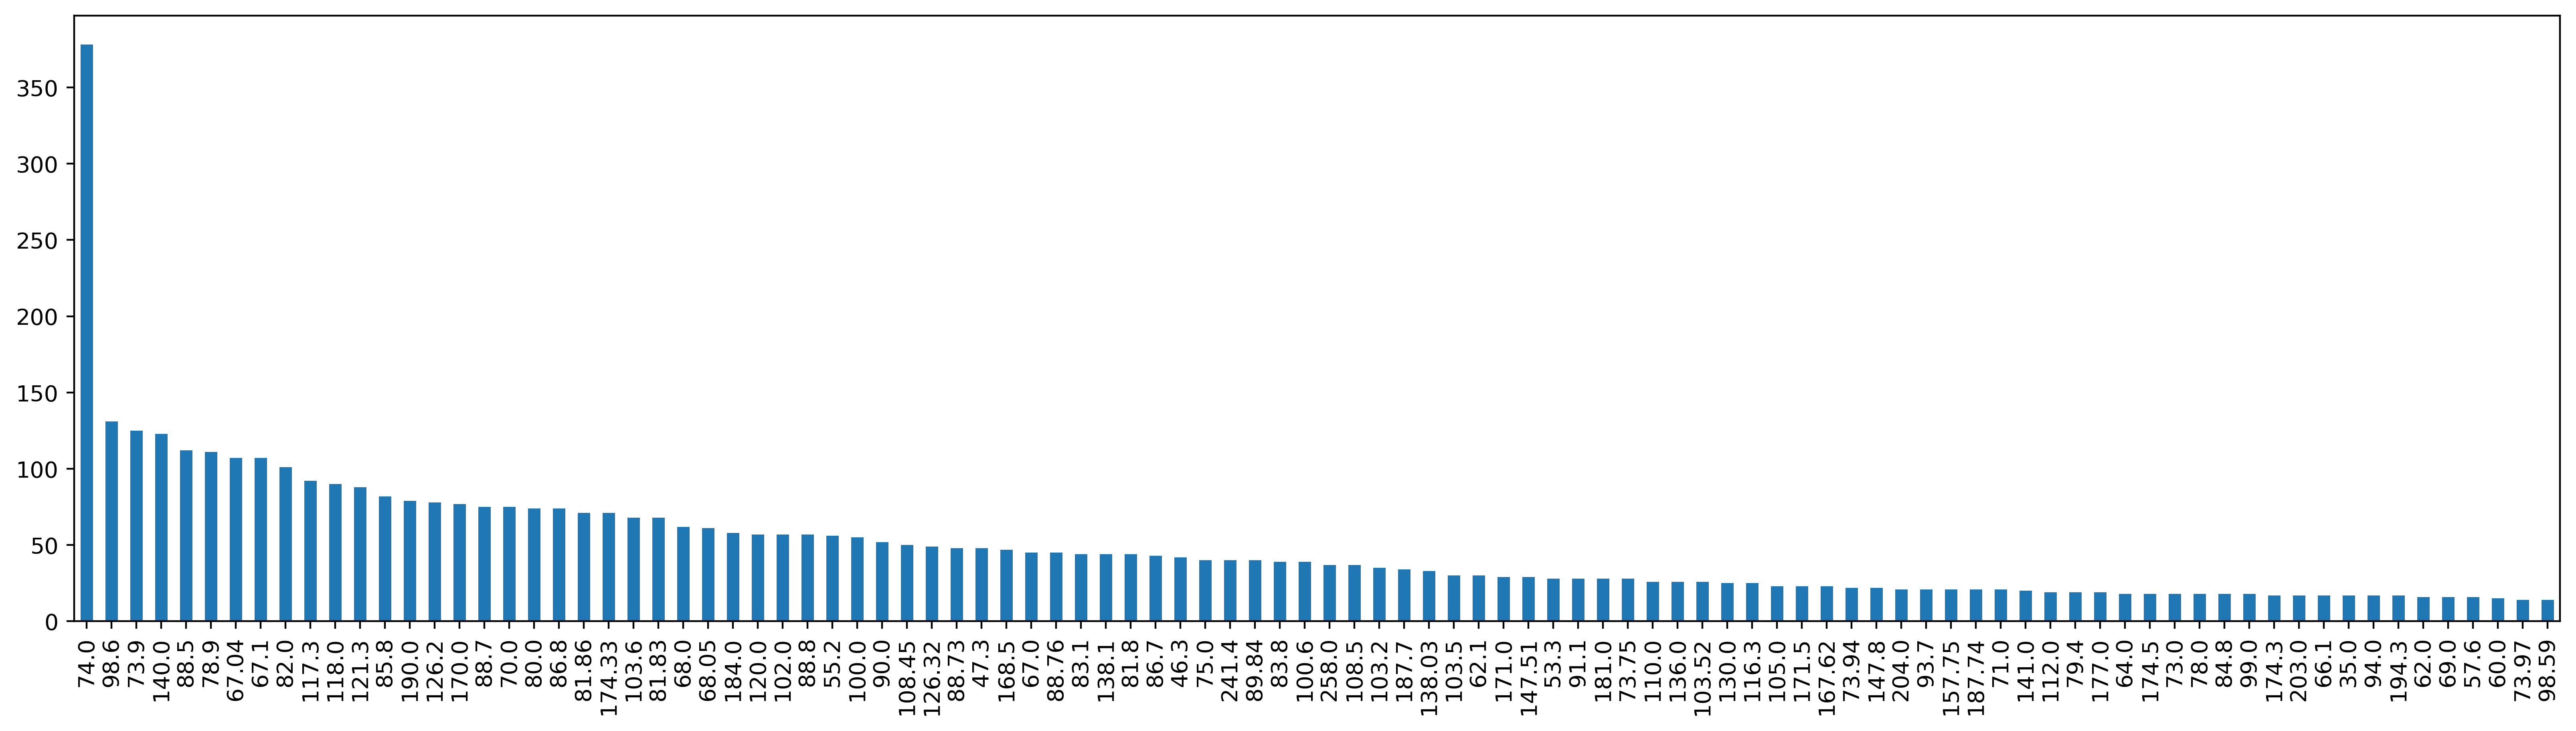

In [45]:
plt.figure(figsize=(20,5), dpi=400)
mp_train['Power'].value_counts().head(100).plot.bar()
plt.show()

In [21]:
mp_train['Power'] = mp_train['Power'].fillna('74')
mp_test['Power'] = mp_test['Power'].fillna('74')

In [22]:
mp_train['Power'] = mp_train['Power'].replace('null', '74')
mp_test['Power'] = mp_test['Power'].replace('null', '74')

In [23]:
mp_train[mp_train.Power== "null"]

,Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [24]:
mp_test[mp_test.Power== "null"]

,Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats


In [25]:
mp_train.isnull().sum()

Name                 0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [26]:
mp_test.isnull().sum()

Name                 0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

<h2> Null Values Imputation Complete

In [27]:
mp_train["Mileage"]=mp_train.Mileage.astype(float)
mp_test["Mileage"]=mp_test.Mileage.astype(float)
mp_train["Year"]=mp_train.Year.astype(float)
mp_test["Year"]=mp_test.Year.astype(float)
mp_train["Power"]=mp_train.Power.astype(float)
mp_test["Power"]=mp_test.Power.astype(float)
mp_train["Engine"]=mp_train.Engine.astype(float)
mp_test["Engine"]=mp_test.Engine.astype(float)
mp_train["Seats"]=mp_train.Seats.astype(int)
mp_test["Seats"]=mp_test.Seats.astype(int)

In [28]:
mp_train.dtypes

Name                  object
Model                 object
Location              object
Year                 float64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                  int32
Price                float64
dtype: object

In [29]:
mp_test.dtypes

Name                  object
Model                 object
Location              object
Year                 float64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                  int32
dtype: object

__Changing DataTypes Completed__

In [30]:
mp_trainfilter=mp_train[mp_train.Kilometers_Driven>300000]
mp_trainfilter

,Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
340,Skoda,Octavia,Kolkata,2013.0,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5,7.50
358,Hyundai,i10,Chennai,2009.0,620000,Petrol,Manual,First,20.36,1197.0,78.90,5,2.70
1860,Volkswagen,Vento,Chennai,2013.0,720000,Diesel,Manual,First,20.54,1598.0,103.60,5,5.90
2328,BMW,X5,Chennai,2017.0,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5,65.00
2823,Volkswagen,Jetta,Chennai,2015.0,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5,13.00
3092,Honda,City,Kolkata,2015.0,480000,Petrol,Manual,First,17.40,1497.0,117.30,5,5.00
4491,Hyundai,i20,Bangalore,2013.0,445000,Petrol,Manual,First,18.50,1197.0,82.90,5,4.45


Here row 340, 1860, 2328, 2823, 3092 should be deleted as there very less chances that someone would buy that car.

In [31]:
mp_train=mp_train.drop(axis=1, index=[340,1860,2328,2823,3092])
mp_train.reset_index(drop=True)
mp_train

,Name,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,Hyundai,Creta,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50
2,Honda,Jazz,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50
3,Maruti,Ertiga,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00
4,Audi,A4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Swift,Delhi,2014.0,27365,Diesel,Manual,First,28.40,1248.0,74.00,5,4.75
6015,Hyundai,Xcent,Jaipur,2015.0,100000,Diesel,Manual,First,24.40,1120.0,71.00,5,4.00
6016,Mahindra,Xylo,Jaipur,2012.0,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8,2.90
6017,Maruti,Wagon,Kolkata,2013.0,46000,Petrol,Manual,First,18.90,998.0,67.10,5,2.65


__Unnecessary Values Removed__

<h2>3.Model Training

__3.1 Train Test Split__

In [32]:
from sklearn.model_selection import train_test_split
Y= np.log1p(mp_train.Price) 
X= mp_train.drop(['Price'],axis=1) #Everything except price column
X_train, X_pred, Y_train, Y_pred= train_test_split(X,Y,train_size=0.96,test_size=0.04,random_state=0)

__3.2 Label Encoding__

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train['Name'] = le.fit_transform(X_train['Name'])
X_pred['Name'] = le.transform(X_pred['Name'])
mp_test['Name'] = le.fit_transform(mp_test['Name'])

X_train['Model'] = le.fit_transform(X_train['Model'])
X_pred['Model'] = le.transform(X_pred['Model'])
mp_test['Model'] = le.fit_transform(mp_test['Model'])

X_train['Location'] = le.fit_transform(X_train['Location'])
X_pred['Location'] = le.transform(X_pred['Location'])
mp_test['Location'] = le.fit_transform(mp_test['Location'])

X_train['Fuel_Type'] = le.fit_transform(X_train['Fuel_Type'])
X_pred['Fuel_Type'] = le.transform(X_pred['Fuel_Type'])
mp_test['Fuel_Type'] = le.fit_transform(mp_test['Fuel_Type'])

X_train['Transmission'] = le.fit_transform(X_train['Transmission'])
X_pred['Transmission'] = le.transform(X_pred['Transmission'])
mp_test['Transmission'] = le.fit_transform(mp_test['Transmission'])

X_train['Owner_Type'] = le.fit_transform(X_train['Owner_Type'])
X_pred['Owner_Type'] = le.transform(X_pred['Owner_Type'])
mp_test['Owner_Type'] = le.fit_transform(mp_test['Owner_Type'])


C:\Users\deeph\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\deeph\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\deeph\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

__3.3 Xgboost Regressor__

In [86]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

my_model = XGBRegressor(objective='reg:linear',max_depth=6, n_estimators=500, learning_rate=0.08)
my_model.fit(X_train, Y_train, 
             early_stopping_rounds=9, 
             eval_set=[(X_pred, Y_pred)], 
             verbose=False)
predict = my_model.predict(X_pred)
print("r2 score is: " + str(r2_score(predict, Y_pred)))

[19:11:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score is: 0.9652845847861363


In [62]:
Y_pred

1861    2.734368
1494    1.916923
5574    2.186051
2081    2.292535
3858    2.122262
          ...   
1633    2.144761
3492    2.970414
5817    1.909543
5667    1.864080
2666    1.757858
Name: Price, Length: 241, dtype: float64

In [87]:
predict

array([2.7009556 , 2.0052958 , 2.2388844 , 2.2047415 , 2.1353598 ,
       2.873118  , 2.0411956 , 1.4318403 , 1.5458001 , 1.6717521 ,
       1.8964311 , 1.56449   , 0.5957937 , 1.8985282 , 1.7173946 ,
       3.5227597 , 1.7210156 , 1.0166583 , 1.4081967 , 1.5402796 ,
       2.6719766 , 2.5430646 , 2.9542449 , 2.1502438 , 1.8425314 ,
       2.5699885 , 1.3849151 , 1.9672711 , 1.8410904 , 1.6849716 ,
       1.8975028 , 1.7964896 , 0.7157235 , 0.73954344, 1.3629142 ,
       2.464751  , 3.1868267 , 1.9119322 , 1.3521222 , 2.5653079 ,
       2.0960855 , 1.3464069 , 1.9841691 , 2.029852  , 1.7938404 ,
       1.1611    , 1.9643126 , 1.5174109 , 1.7217767 , 1.9019895 ,
       3.5134797 , 1.9651217 , 1.7266088 , 2.5597582 , 2.939183  ,
       1.8371847 , 1.4271767 , 1.5414011 , 1.6127846 , 3.1509058 ,
       2.6961448 , 2.0211806 , 1.3211799 , 3.5205967 , 2.0590692 ,
       1.4825108 , 1.7077996 , 2.8364682 , 3.3010495 , 1.4338204 ,
       1.400004  , 4.2485647 , 2.123651  , 1.9636075 , 1.30877

__3.4 Data Prediction for Test Data__

In [35]:
Data_Predict = my_model.predict(mp_test)
Data_Predict = np.exp(Data_Predict)-1

print(Data_Predict)

[ 3.278088   3.2382998 16.385015  ...  2.981491   3.0208373 17.99691  ]


In [76]:
test=pd.read_excel("Data_Test.xlsx")
output = pd.DataFrame({'Name' : test['Name'],
                       'Price': Data_Predict})
output.to_csv('Predicted_Prices.csv', index=False)

<h1><center>End of the Project<h1><center>
    Deep Hudka